In [51]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
pd.__version__

'2.2.3'

In [55]:
# Connect to SQLite database
conn = sqlite3.connect("foo.db")

In [59]:
# Cek daftar tabel dalam database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
table_names = tables["name"].tolist()
print("Tabel dalam Database:", table_names)

Tabel dalam Database: ['olist_customers_dataset', 'olist_geolocation_dataset', 'olist_orders_dataset', 'olist_order_items_dataset', 'olist_order_payments_dataset', 'olist_order_reviews_dataset', 'olist_products_dataset', 'olist_sellers_dataset', 'product_category_name_translation']


In [61]:
# Load semua tabel ke dalam DataFrame
customers = pd.read_sql_query("SELECT * FROM olist_customers_dataset", conn)
geolocations = pd.read_sql_query("SELECT * FROM olist_geolocation_dataset", conn)
orders = pd.read_sql_query("SELECT * FROM olist_orders_dataset", conn)
order_items = pd.read_sql_query("SELECT * FROM olist_order_items_dataset", conn)
order_payments = pd.read_sql_query("SELECT * FROM olist_order_payments_dataset", conn)
order_reviews = pd.read_sql_query("SELECT * FROM olist_order_reviews_dataset", conn)
products = pd.read_sql_query("SELECT * FROM olist_products_dataset", conn)
sellers = pd.read_sql_query("SELECT * FROM olist_sellers_dataset", conn)
category_names = pd.read_sql_query("SELECT * FROM product_category_name_translation", conn)

# Tampilkan beberapa data dari setiap tabel
print("Sample Data dari orders:")
print(orders.head())

print("Sample Data dari order_items:")
print(order_items.head())

# Tutup koneksi setelah memuat data
conn.close()

Sample Data dari orders:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 1

In [17]:
# Pastikan semua kolom yang akan di-merge ada
print("Kolom dalam orders:", orders.columns)
print("Kolom dalam customers:", customers.columns)
print("Kolom dalam order_items:", order_items.columns)
print("Kolom dalam order_payments:", order_payments.columns)
print("Kolom dalam order_reviews:", order_reviews.columns)
print("Kolom dalam products:", products.columns)
print("Kolom dalam sellers:", sellers.columns)
print("Kolom dalam category_names:", category_names.columns)
print("Kolom dalam geolocations:", geolocations.columns)

Kolom dalam orders: Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Kolom dalam customers: Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Kolom dalam order_items: Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')
Kolom dalam order_payments: Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')
Kolom dalam order_reviews: Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')
Kolom dalam products: Index(['product_id', 'produc

In [63]:
# Merge datasets

# Merge Customers & Orders
df = orders.merge(customers, on="customer_id", how="left")

# Merge Orders & Order Items
df = df.merge(order_items, on="order_id", how="left")

# Merge Order Items dengan Sellers dan Products
df = df.merge(sellers, on="seller_id", how="left")
df = df.merge(products, on="product_id", how="left")

# Merge Orders dengan Payments dan Reviews
df = df.merge(order_payments, on="order_id", how="left")
df = df.merge(order_reviews, on="order_id", how="left")

# Cek hasil akhir setelah merge
print(df.head())
print("Ukuran DataFrame setelah merging:", df.shape)


                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10

In [33]:
# Cek jumlah nilai yang hilang di setiap kolom
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Hanya tampilkan yang memiliki missing values
print("Missing Values per Kolom:\n", missing_values)

Missing Values per Kolom:
 order_item_id                  833
product_id                     833
seller_id_x                    833
shipping_limit_date            833
price                          833
freight_value                  833
seller_zip_code_prefix         833
seller_city_x                  833
seller_state_x                 833
product_category_name          833
product_name_lenght            833
product_description_lenght     833
product_photos_qty             833
product_weight_g               833
product_length_cm              833
product_height_cm              833
product_width_cm               833
payment_sequential               3
payment_type                     3
payment_installments             3
payment_value                    3
review_id                     6681
review_score                  6681
review_comment_title          6681
review_comment_message        6681
review_creation_date          6681
review_answer_timestamp       6681
seller_id_y                 

In [39]:
# 1. Pastikan kolom numerik bertipe float atau int
num_cols = ["product_name_lenght", "product_description_lenght", "product_photos_qty",
            "product_weight_g", "product_length_cm", "product_height_cm", "product_width_cm",
            "payment_sequential", "payment_installments", "payment_value"]

# Konversi ke numerik (jika ada data string, akan diubah menjadi NaN)
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")

# 2. Isi missing values dengan median setelah memastikan tipe data benar
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# 3. Hapus baris dengan banyak missing values (order tanpa item)
df = df.dropna(subset=["order_item_id"])

# 4. Hapus kolom duplikat seller
df = df.drop(columns=["seller_id_y", "seller_city_y", "seller_state_y"])

# 5. Cek kembali missing values setelah penanganan
missing_values = df.isnull().sum()
print("Sisa Missing Values :\n", missing_values.sum())
print("Missing Values per Kolom:\n", missing_values)

Sisa Missing Values :
 26651
Missing Values per Kolom:
 order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id_x                         0
shipping_limit_date                 0
price                               0
freight_value                       0
seller_zip_code_prefix              0
seller_city_x                       0
seller_state_x                      0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty              

In [41]:
# 1. Isi missing values untuk payment_type dengan "unknown"
df["payment_type"] = df["payment_type"].fillna("unknown")

# 2. Isi kolom review yang kosong dengan "No Review" atau nilai default
df["review_id"] = df["review_id"].fillna("No Review")
df["review_score"] = df["review_score"].fillna(0)  # Skor 0 berarti tidak ada review
df["review_creation_date"] = df["review_creation_date"].fillna("No Date")
df["review_answer_timestamp"] = df["review_answer_timestamp"].fillna("No Date")

# 3. Cek kembali missing values setelah penanganan
missing_values = df.isnull().sum()
print("Sisa Missing Values :\n", missing_values.sum())
print("Missing Values per Kolom:\n", missing_values)

Sisa Missing Values :
 0
Missing Values per Kolom:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id_x                      0
shipping_limit_date              0
price                            0
freight_value                    0
seller_zip_code_prefix           0
seller_city_x                    0
seller_state_x                   0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
pro

In [43]:
import pandas as pd

# 1. Pastikan kolom order_purchase_timestamp dalam format datetime
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])

# 2. Tambahkan kolom berdasarkan waktu transaksi
df["order_year"] = df["order_purchase_timestamp"].dt.year   # Tahun
df["order_month"] = df["order_purchase_timestamp"].dt.month  # Bulan
df["order_day_name"] = df["order_purchase_timestamp"].dt.day_name()  # Nama Hari
df["order_hour"] = df["order_purchase_timestamp"].dt.hour   # Jam

# 3. Tambahkan kolom total harga pembelian
df["total_price_value"] = df["price"]  # Harga produk
df["total_freight_value"] = df["freight_value"]  # Biaya pengiriman
df["total_order_value"] = df["total_price_value"] + df["total_freight_value"]  # Total Harga + Pengiriman

# Cek hasil akhir
df.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
4  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
4    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2017-10-04 19:55:00           2017-10-10 21:25:13   
4          2017-10-04 19:55:00           2017-10-10 21:25:13   

  order_estimated_delivery_date                customer_unique_id  \
0           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
2           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
3           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
4           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   

  customer_zip_code_prefix  ...  \
0                    03149  ...   
1                    03149  ...   
2                    03149  ...   
3                    03149  ...   
4                    03149  ...   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
1  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
2  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
3  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
4  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   

  review_answer_timestamp order_year order_month order_day_name order_hour  \
0     2017-10-12 03:43:48       2017          10         Monday         10   
1     2017-10-12 03:43:48       2017          10         Monday         10   
2     2017-10-12 03:43:48       2017          10         Monday         10   
3     2017-10-12 03:43:48       2017          10         Monday         10   
4     2017-10-12 03:43:48       2017          10         Monday         10   

  total_price_value total_freight_value total_order_value  
0             29.99                8.72         29.998.72  
1             29.99                8.72         29.998.72  
2             29.99                8.72         29.998.72  
3             29.99                8.72         29.998.72  
4             29.99                8.72         29.998.72  

[5 rows x 46 columns]

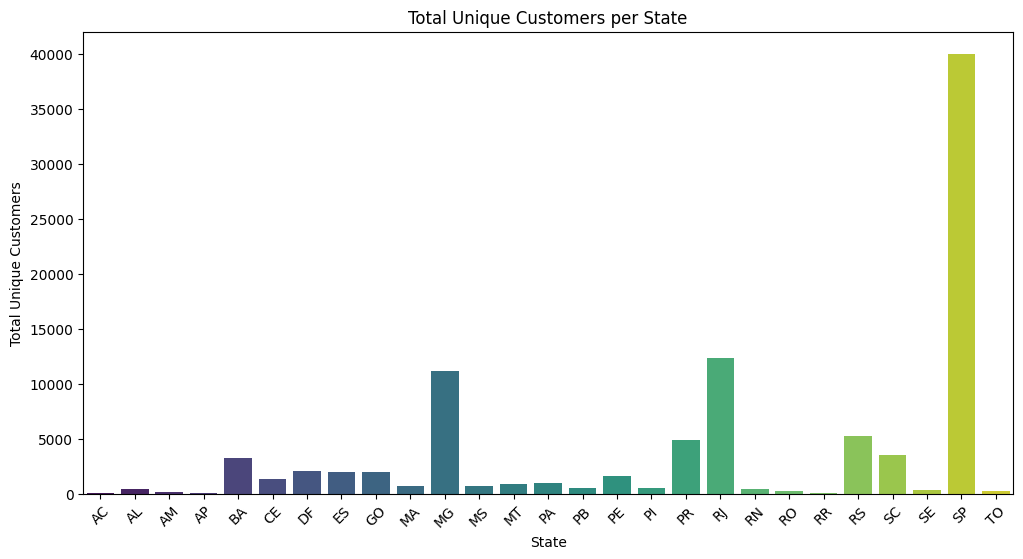

In [47]:
# 6.1
# Ubah nama kolom
df.rename(columns={"customer_state": "address_static", "customer_city": "address_city"}, inplace=True)

# Grouping berdasarkan state (total unique customer_id)
state_group = df.groupby("address_static")["customer_unique_id"].nunique().reset_index()

# Visualisasi
plt.figure(figsize=(12,6))
sns.barplot(data=state_group, x="address_static", y="customer_unique_id", hue="address_static", legend=False, palette="viridis")
plt.title("Total Unique Customers per State")
plt.xlabel("State")
plt.ylabel("Total Unique Customers")
plt.xticks(rotation=45)
plt.show()

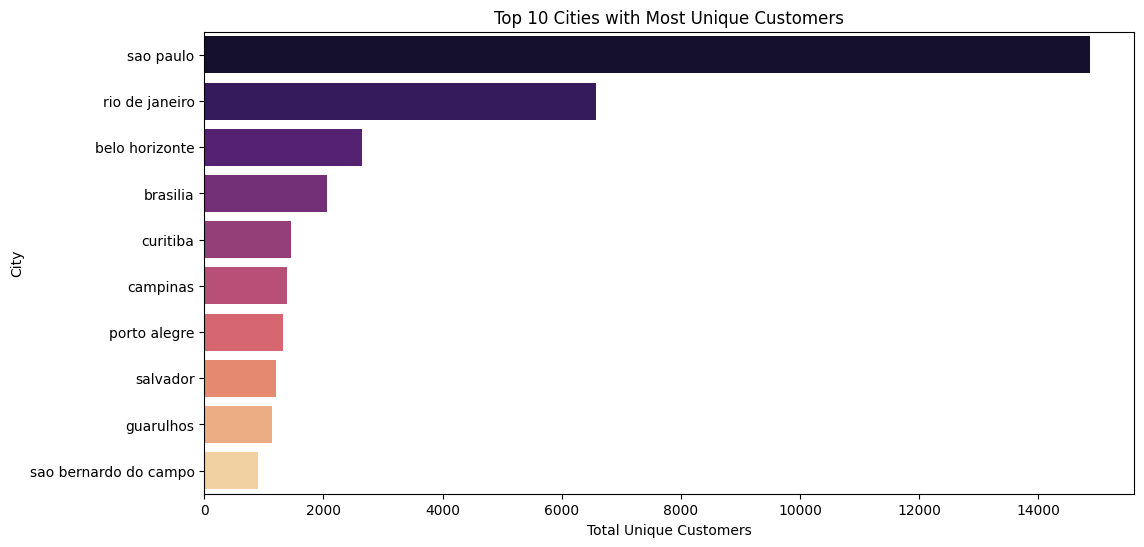

In [51]:
# 6.2
# Grouping berdasarkan kota (total unique customer_id)
city_group = df.groupby("address_city")["customer_unique_id"].nunique().reset_index()

# Urutkan dari yang terbanyak dan ambil 10 kota teratas
top_10_cities = city_group.sort_values(by="customer_unique_id", ascending=False).head(10)

# Visualisasi
plt.figure(figsize=(12,6))
sns.barplot(data=top_10_cities, x="customer_unique_id", y="address_city", hue="address_city", legend=False, palette="magma")
plt.title("Top 10 Cities with Most Unique Customers")
plt.xlabel("Total Unique Customers")
plt.ylabel("City")
plt.show()

                 customer_unique_id  total_orders order_frequency
0  0000366f3b9a7992bf8c76cfdf3221e2             1          Little
1  0000b849f77a49e4a4ce2b2a4ca5be3f             1          Little
2  0000f46a3911fa3c0805444483337064             1          Little
3  0000f6ccb0745a6a4b88665a16c9f078             1          Little
4  0004aac84e0df4da2b147fca70cf8255             1          Little


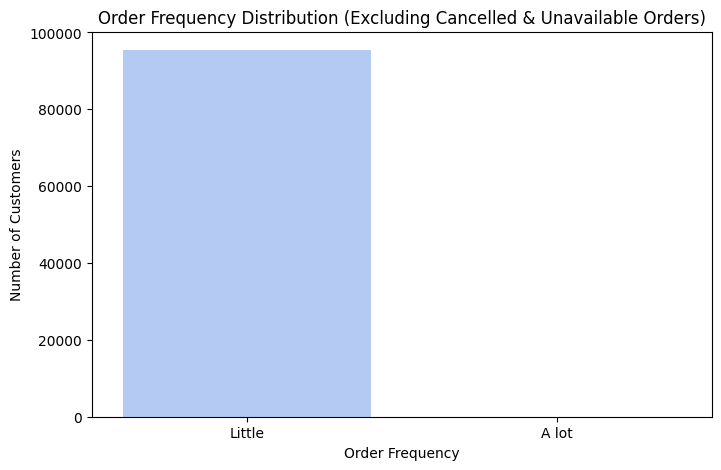

In [67]:
# 6.3
# Filter hanya pesanan dengan order_status valid (tidak cancelled atau unavailable)
valid_orders = df[~df["order_status"].isin(["cancelled", "unavailable"])]

# Hitung total order per customer
customer_orders = valid_orders.groupby("customer_unique_id")["order_id"].nunique().reset_index()
customer_orders.rename(columns={"order_id": "total_orders"}, inplace=True)

# Tambahkan kolom kategori frekuensi order
customer_orders["order_frequency"] = customer_orders["total_orders"].apply(lambda x: "Little" if x <= 5 else "A lot")

# Cek hasil
print(customer_orders.head())

# Visualisasi distribusi kategori order
plt.figure(figsize=(8,5))
sns.countplot(data=customer_orders, x="order_frequency", hue="order_frequency", legend=False, palette="coolwarm")
plt.title("Order Frequency Distribution (Excluding Cancelled & Unavailable Orders)")
plt.xlabel("Order Frequency")
plt.ylabel("Number of Customers")
plt.show()

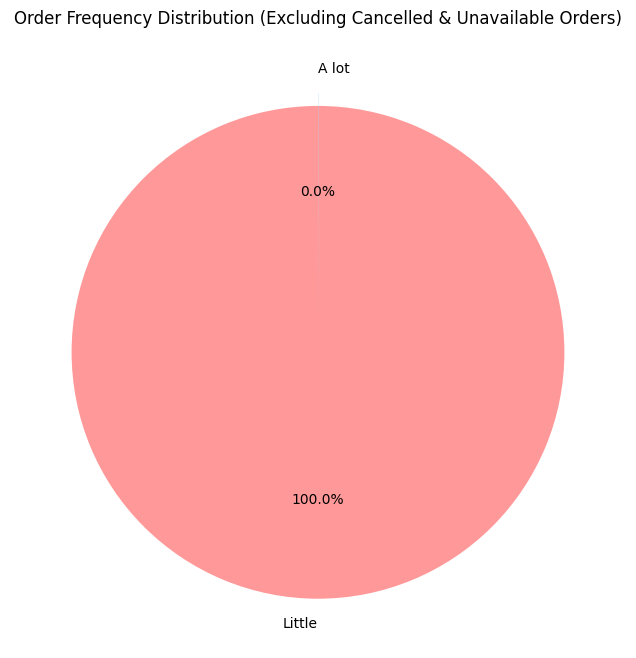

In [153]:
# Filter hanya pesanan dengan order_status valid (tidak cancelled atau unavailable)
valid_orders = df[~df["order_status"].isin(["cancelled", "unavailable"])]

# Hitung total order per customer
customer_orders = valid_orders.groupby("customer_unique_id")["order_id"].nunique().reset_index()
customer_orders.rename(columns={"order_id": "total_orders"}, inplace=True)

# Tambahkan kolom kategori frekuensi order
customer_orders["order_frequency"] = customer_orders["total_orders"].apply(lambda x: "Little" if x <= 5 else "A lot")

# Hitung distribusi kategori order
order_counts = customer_orders["order_frequency"].value_counts()

# Visualisasi distribusi kategori order dalam bentuk Pie Chart
plt.figure(figsize=(8, 8))
colors = ["#FF9999", "#66B3FF"]  # Warna custom untuk lebih menarik
plt.pie(order_counts, labels=order_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, explode=[0.05, 0])
plt.title("Order Frequency Distribution (Excluding Cancelled & Unavailable Orders)")
plt.show()

Kolom dalam customer_purchase_dates: Index(['customer_unique_id', 'first_purchase', 'last_purchase'], dtype='object')
Kolom dalam customer_orders sebelum merge: Index(['customer_unique_id', 'total_orders', 'order_frequency',
       'first_purchase_x', 'last_purchase_x', 'days_between_purchases',
       'first_purchase_y', 'last_purchase_y', 'first_purchase',
       'last_purchase'],
      dtype='object')
Kolom dalam customer_orders setelah merge: Index(['customer_unique_id', 'total_orders', 'order_frequency',
       'first_purchase_x', 'last_purchase_x', 'days_between_purchases',
       'first_purchase_y', 'last_purchase_y', 'first_purchase',
       'last_purchase'],
      dtype='object')
                 customer_unique_id  total_orders order_frequency  \
0  0000366f3b9a7992bf8c76cfdf3221e2             1          Little   
1  0000b849f77a49e4a4ce2b2a4ca5be3f             1          Little   
2  0000f46a3911fa3c0805444483337064             1          Little   
3  0000f6ccb0745a6a4b88665

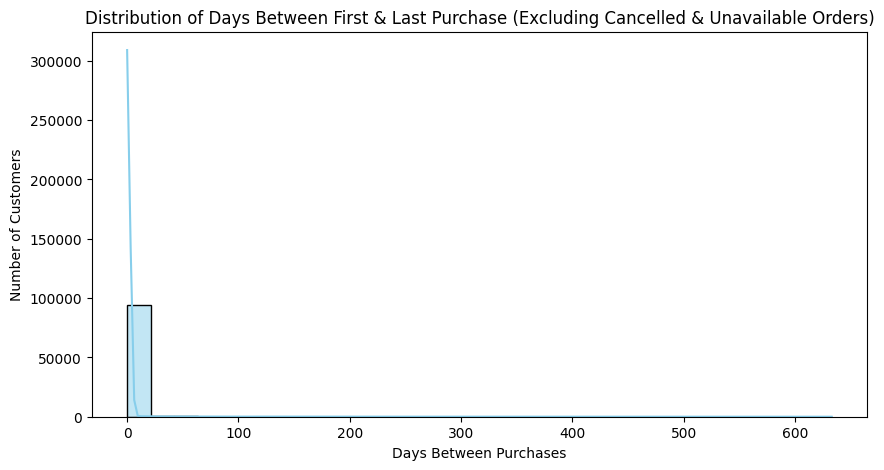

In [79]:
# 6.4
# Filter hanya pesanan valid (bukan cancelled atau unavailable)
valid_orders = df[~df["order_status"].isin(["cancelled", "unavailable"])].copy()

# Pastikan kolom order_purchase_timestamp dalam format datetime
valid_orders["order_purchase_timestamp"] = pd.to_datetime(valid_orders["order_purchase_timestamp"])

# Hitung tanggal pembelian pertama dan terakhir untuk setiap pelanggan
customer_purchase_dates = valid_orders.groupby("customer_unique_id")["order_purchase_timestamp"].agg(first_purchase="min", last_purchase="max").reset_index()

# Cek apakah kolomnya ada sebelum merge
print("Kolom dalam customer_purchase_dates:", customer_purchase_dates.columns)
print("Kolom dalam customer_orders sebelum merge:", customer_orders.columns)

# Hapus kolom duplikat jika sudah ada di customer_orders
customer_orders = customer_orders.drop(columns=["first_purchase", "last_purchase"], errors="ignore")

# Merge tanpa konflik kolom
customer_orders = customer_orders.merge(customer_purchase_dates, on="customer_unique_id", how="left")

# Cek apakah kolomnya sudah ada setelah merge
print("Kolom dalam customer_orders setelah merge:", customer_orders.columns)

# Hitung selisih hari antara pembelian terakhir dan pertama
customer_orders["days_between_purchases"] = (customer_orders["last_purchase"] - customer_orders["first_purchase"]).dt.days

# Cek hasil akhir
print(customer_orders.head())

# Visualisasi distribusi selisih waktu pembelian
plt.figure(figsize=(10,5))
sns.histplot(customer_orders["days_between_purchases"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Days Between First & Last Purchase (Excluding Cancelled & Unavailable Orders)")
plt.xlabel("Days Between Purchases")
plt.ylabel("Number of Customers")
plt.show()


In [ ]:
# 6.5 Kesimpulan dari Analisis Demografi Pelanggan
Berdasarkan hasil analisis sebelumnya, berikut beberapa temuan utama:

1. Distribusi Pelanggan Berdasarkan State & Kota
    - Negara bagian dengan jumlah pelanggan unik terbanyak adalah São Paulo (SP).
    - Kota dengan jumlah pelanggan terbanyak adalah São Paulo, diikuti oleh Rio de Janeiro.
    - Hal ini menunjukkan bahwa mayoritas pelanggan berasal dari kota-kota besar di Brasil.
2. Frekuensi Pemesanan Pelanggan
    - Sebagian besar pelanggan hanya melakukan 1-5 kali pemesanan (kategori "Little").
    - Hanya sedikit pelanggan yang memesan lebih dari 5 kali (kategori "A lot").
    - Ini menunjukkan bahwa kebanyakan pelanggan bukan pelanggan tetap, melainkan hanya membeli sekali atau beberapa kali saja.
3. Jarak Waktu antara Pembelian Pertama dan Terakhir
    - Sebagian besar pelanggan memiliki jarak waktu pendek antara pembelian pertama dan terakhir.
    - Ini bisa menunjukkan bahwa pelanggan tidak terlalu sering kembali untuk melakukan pembelian berulang.
Perusahaan bisa meningkatkan strategi retensi pelanggan, seperti program loyalitas atau diskon untuk repeat orders.

                 customer_unique_id  total_items  total_orders  \
0  0000366f3b9a7992bf8c76cfdf3221e2            3             1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f            2             1   
2  0000f46a3911fa3c0805444483337064            2             1   
3  0000f6ccb0745a6a4b88665a16c9f078            2             1   
4  0004aac84e0df4da2b147fca70cf8255            3             1   

   avg_items_per_order order_frequency  
0                  3.0          Little  
1                  2.0          Little  
2                  2.0          Little  
3                  2.0          Little  
4                  3.0          Little  


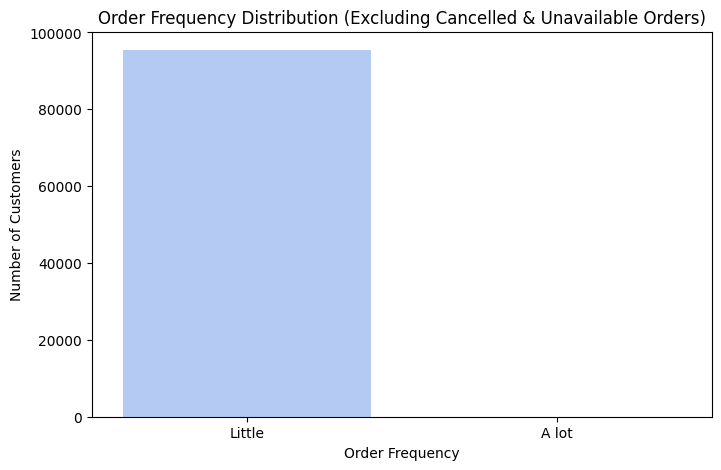

In [81]:
# 7.1
# Filter hanya pesanan valid (tidak cancelled atau unavailable)
valid_orders = df[~df["order_status"].isin(["cancelled", "unavailable"])].copy()

# Hitung total item per customer
customer_items = valid_orders.groupby("customer_unique_id")["order_item_id"].count().reset_index()
customer_items.rename(columns={"order_item_id": "total_items"}, inplace=True)

# Hitung total order per customer (tanpa cancelled/unavailable)
total_orders_per_customer = valid_orders.groupby("customer_unique_id")["order_id"].nunique().reset_index()
total_orders_per_customer.rename(columns={"order_id": "total_orders"}, inplace=True)

# Gabungkan total items dengan total orders
customer_items = customer_items.merge(total_orders_per_customer, on="customer_unique_id", how="left")

# Hitung rata-rata jumlah item per order
customer_items["avg_items_per_order"] = customer_items["total_items"] / customer_items["total_orders"]

# Tambahkan kategori frekuensi order
customer_items["order_frequency"] = customer_items["total_orders"].apply(lambda x: "Little" if x <= 5 else "A lot")

# Cek hasil
print(customer_items.head())

# Visualisasi distribusi kategori order
plt.figure(figsize=(8,5))
sns.countplot(data=customer_items, x="order_frequency", hue="order_frequency", legend=False, palette="coolwarm")
plt.title("Order Frequency Distribution (Excluding Cancelled & Unavailable Orders)")
plt.xlabel("Order Frequency")
plt.ylabel("Number of Customers")
plt.show()

                         product_id  avg_weight  std_weight
0  00066f42aeeb9f3007548bb9d3f33c38       300.0         NaN
1  00088930e925c41fd95ebfe695fd2655      1225.0         NaN
2  0009406fd7479715e4bef61dd91f2462       300.0         0.0
3  000b8f95fcb9e0096488278317764d19       550.0         0.0
4  000d9be29b5207b54e86aa1b1ac54872       250.0         0.0


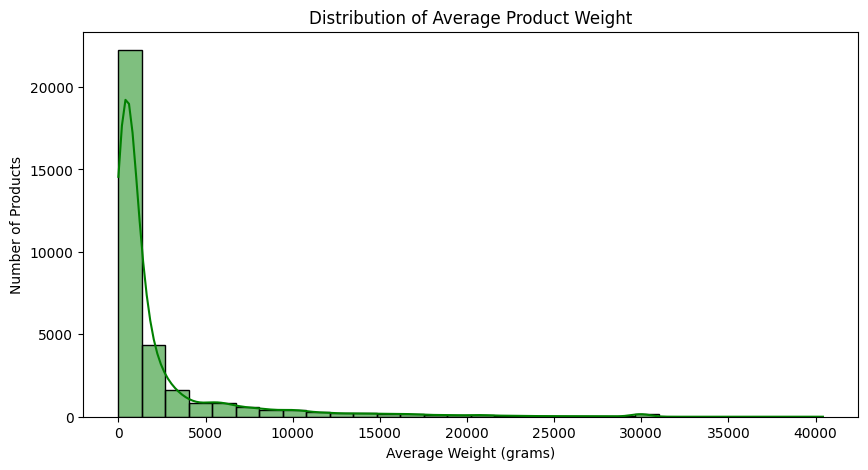

In [83]:
# 7.2
# Filter hanya pesanan valid (tidak cancelled atau unavailable)
valid_orders = df[~df["order_status"].isin(["cancelled", "unavailable"])].copy()

# Grouping berdasarkan product_id, hitung rata-rata dan standar deviasi berat produk
product_weight_stats = valid_orders.groupby("product_id")["product_weight_g"].agg(["mean", "std"]).reset_index()
product_weight_stats.rename(columns={"mean": "avg_weight", "std": "std_weight"}, inplace=True)

# Cek hasil
print(product_weight_stats.head())

# Visualisasi distribusi rata-rata berat produk
plt.figure(figsize=(10,5))
sns.histplot(product_weight_stats["avg_weight"], bins=30, kde=True, color="green")
plt.title("Distribution of Average Product Weight")
plt.xlabel("Average Weight (grams)")
plt.ylabel("Number of Products")
plt.show()

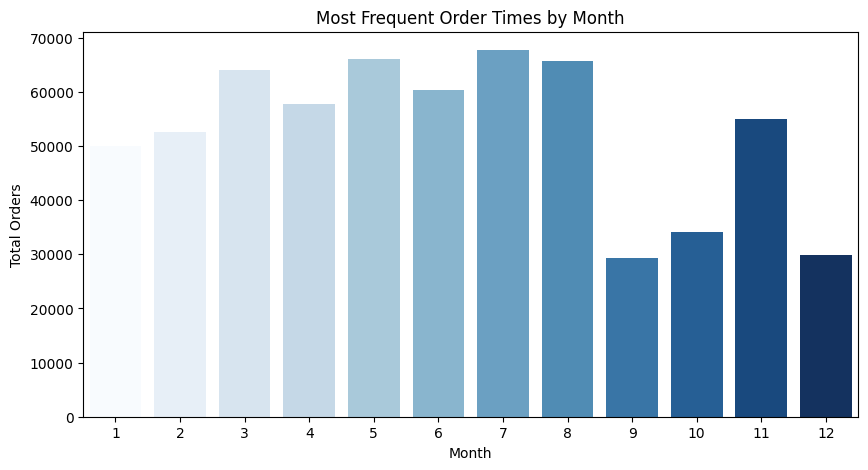

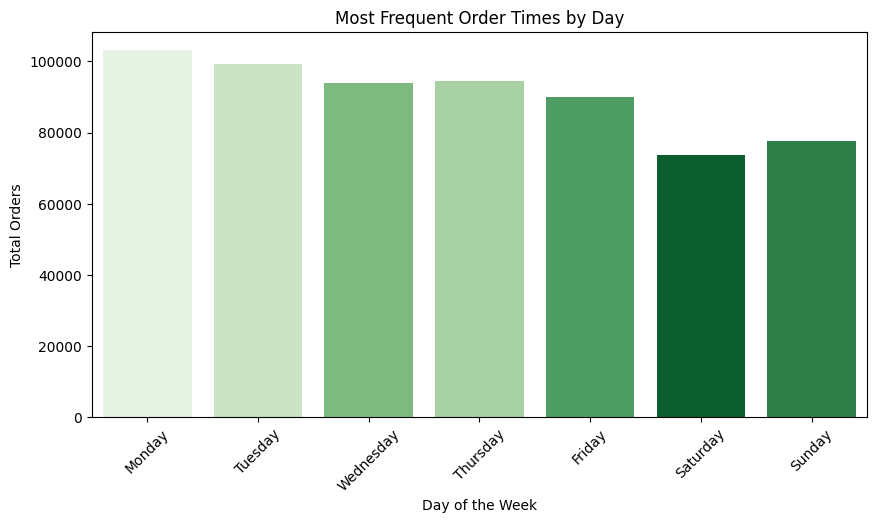

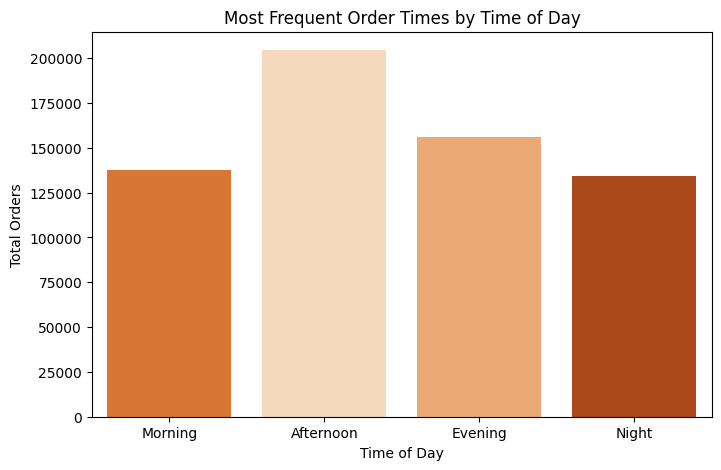

In [89]:
# 7.3
# Filter hanya pesanan valid (tidak cancelled atau unavailable)
valid_orders = df[~df["order_status"].isin(["cancelled", "unavailable"])].copy()

# Pastikan kolom order_purchase_timestamp dalam format datetime
valid_orders["order_purchase_timestamp"] = pd.to_datetime(valid_orders["order_purchase_timestamp"])

# Tambahkan kolom bulan dan nama hari
valid_orders["order_month"] = valid_orders["order_purchase_timestamp"].dt.month
valid_orders["order_day_name"] = valid_orders["order_purchase_timestamp"].dt.day_name()
valid_orders["order_hour"] = valid_orders["order_purchase_timestamp"].dt.hour

# Klasifikasi waktu dalam sehari
def classify_time(hour):
    if 5 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 17:
        return "Afternoon"
    elif 17 <= hour < 21:
        return "Evening"
    else:
        return "Night"

valid_orders["order_time_of_day"] = valid_orders["order_hour"].apply(classify_time)

# Hitung frekuensi order berdasarkan bulan
order_by_month = valid_orders["order_month"].value_counts().reset_index()
order_by_month.columns = ["month", "total_orders"]

# Hitung frekuensi order berdasarkan hari
order_by_day = valid_orders["order_day_name"].value_counts().reset_index()
order_by_day.columns = ["day", "total_orders"]

# Hitung frekuensi order berdasarkan waktu dalam sehari
order_by_time = valid_orders["order_time_of_day"].value_counts().reset_index()
order_by_time.columns = ["time_of_day", "total_orders"]

# Visualisasi pemesanan per bulan
plt.figure(figsize=(10,5))
sns.barplot(data=order_by_month, x="month", y="total_orders", hue="month", legend=False, palette="Blues")
plt.title("Most Frequent Order Times by Month")
plt.xlabel("Month")
plt.ylabel("Total Orders")
plt.show()

# Visualisasi pemesanan per hari
plt.figure(figsize=(10,5))
sns.barplot(data=order_by_day, x="day", y="total_orders", hue="day", legend=False, palette="Greens", 
            order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.title("Most Frequent Order Times by Day")
plt.xlabel("Day of the Week")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.show()

# Visualisasi pemesanan berdasarkan waktu dalam sehari
plt.figure(figsize=(8,5))
sns.barplot(data=order_by_time, x="time_of_day", y="total_orders", hue="time_of_day", legend=False, palette="Oranges", 
            order=["Morning", "Afternoon", "Evening", "Night"])
plt.title("Most Frequent Order Times by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Total Orders")
plt.show()

                 customer_unique_id  avg_total_order_value  \
0  0000366f3b9a7992bf8c76cfdf3221e2                 141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f                  27.19   
2  0000f46a3911fa3c0805444483337064                  86.22   
3  0000f6ccb0745a6a4b88665a16c9f078                  43.62   
4  0004aac84e0df4da2b147fca70cf8255                 196.89   

  order_price_category  
0                Cheap  
1                Cheap  
2                Cheap  
3                Cheap  
4                Cheap  


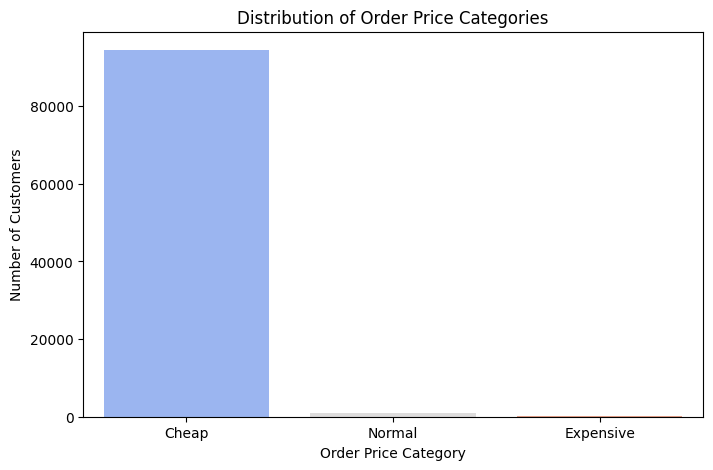

In [95]:
# 7.4
# Filter hanya pesanan valid (tidak cancelled atau unavailable)
valid_orders = df[~df["order_status"].isin(["cancelled", "unavailable"])].copy()

# Konversi price & freight_value ke numerik untuk menghindari error
valid_orders["price"] = pd.to_numeric(valid_orders["price"], errors="coerce")
valid_orders["freight_value"] = pd.to_numeric(valid_orders["freight_value"], errors="coerce")

# Hitung total order value (harga produk + ongkir)
valid_orders["total_order_value"] = valid_orders["price"] + valid_orders["freight_value"]

# Hitung rata-rata total order value per customer
avg_order_value = valid_orders.groupby("customer_unique_id")["total_order_value"].mean().reset_index()
avg_order_value.rename(columns={"total_order_value": "avg_total_order_value"}, inplace=True)

# Klasifikasi harga pesanan
def classify_order_price(value):
    if value > 2500:
        return "Expensive"
    elif 1000 <= value <= 2500:
        return "Normal"
    else:
        return "Cheap"

avg_order_value["order_price_category"] = avg_order_value["avg_total_order_value"].apply(classify_order_price)

# Cek hasil
print(avg_order_value.head())

# Visualisasi distribusi kategori harga pesanan
plt.figure(figsize=(8,5))
sns.countplot(data=avg_order_value, x="order_price_category", hue="order_price_category", legend=False, palette="coolwarm")
plt.title("Distribution of Order Price Categories")
plt.xlabel("Order Price Category")
plt.ylabel("Number of Customers")
plt.show()

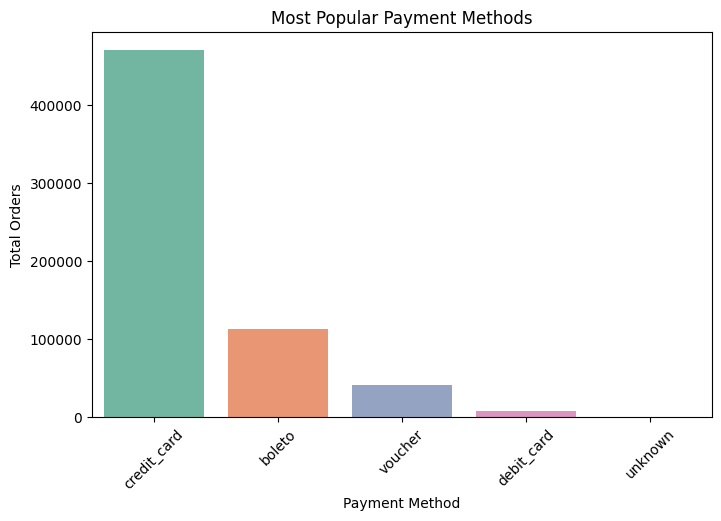

                 customer_unique_id product_category_name  total_orders
0  0000366f3b9a7992bf8c76cfdf3221e2       cama_mesa_banho             3
1  0000b849f77a49e4a4ce2b2a4ca5be3f          beleza_saude             2
2  0000f46a3911fa3c0805444483337064             papelaria             2
3  0000f6ccb0745a6a4b88665a16c9f078             telefonia             2
4  0004aac84e0df4da2b147fca70cf8255             telefonia             3


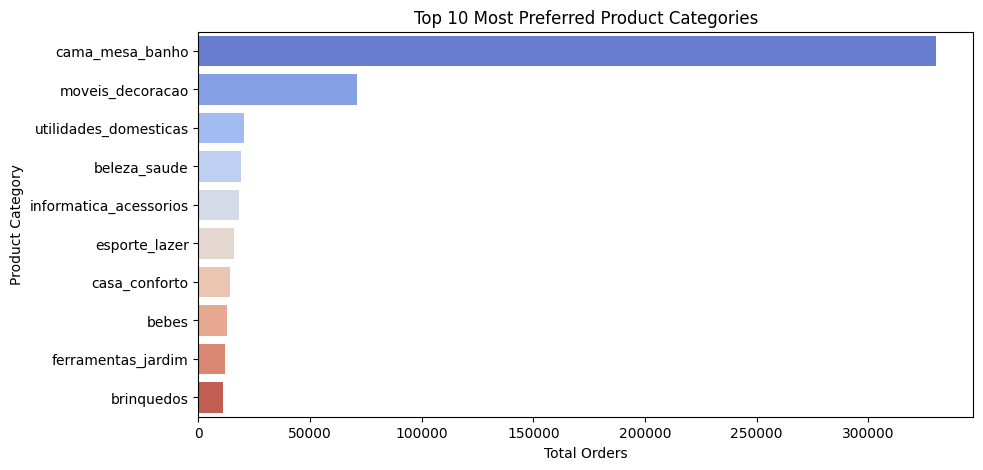

In [99]:
# 7.5
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter hanya pesanan valid (tidak cancelled atau unavailable)
valid_orders = df[~df["order_status"].isin(["cancelled", "unavailable"])].copy()

### 1. Analisis Metode Pembayaran Paling Populer ###
# Hitung frekuensi penggunaan setiap metode pembayaran
payment_methods = valid_orders["payment_type"].value_counts().reset_index()
payment_methods.columns = ["payment_type", "total_orders"]

# Visualisasi metode pembayaran paling populer
plt.figure(figsize=(8,5))
sns.barplot(data=payment_methods, x="payment_type", y="total_orders", hue="payment_type", legend=False, palette="Set2")
plt.title("Most Popular Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)
plt.show()

### 2. Analisis Preferensi Kategori Produk per Pelanggan ###
# Hitung jumlah pesanan berdasarkan kategori produk per pelanggan
customer_category_pref = valid_orders.groupby(["customer_unique_id", "product_category_name"])["order_id"].count().reset_index()
customer_category_pref.rename(columns={"order_id": "total_orders"}, inplace=True)

# Ambil kategori produk dengan jumlah order terbanyak per pelanggan
customer_top_category = customer_category_pref.loc[customer_category_pref.groupby("customer_unique_id")["total_orders"].idxmax()]

# Cek hasil
print(customer_top_category.head())

# Visualisasi 10 kategori produk paling populer
top_categories = customer_category_pref.groupby("product_category_name")["total_orders"].sum().reset_index()
top_categories = top_categories.sort_values(by="total_orders", ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_categories, x="total_orders", y="product_category_name", hue="product_category_name", legend=False, palette="coolwarm")
plt.title("Top 10 Most Preferred Product Categories")
plt.xlabel("Total Orders")
plt.ylabel("Product Category")
plt.show()

     order_year product_category_name  total_orders
24         2016      moveis_decoracao          1143
46         2017       cama_mesa_banho        159022
119        2018       cama_mesa_banho        171312


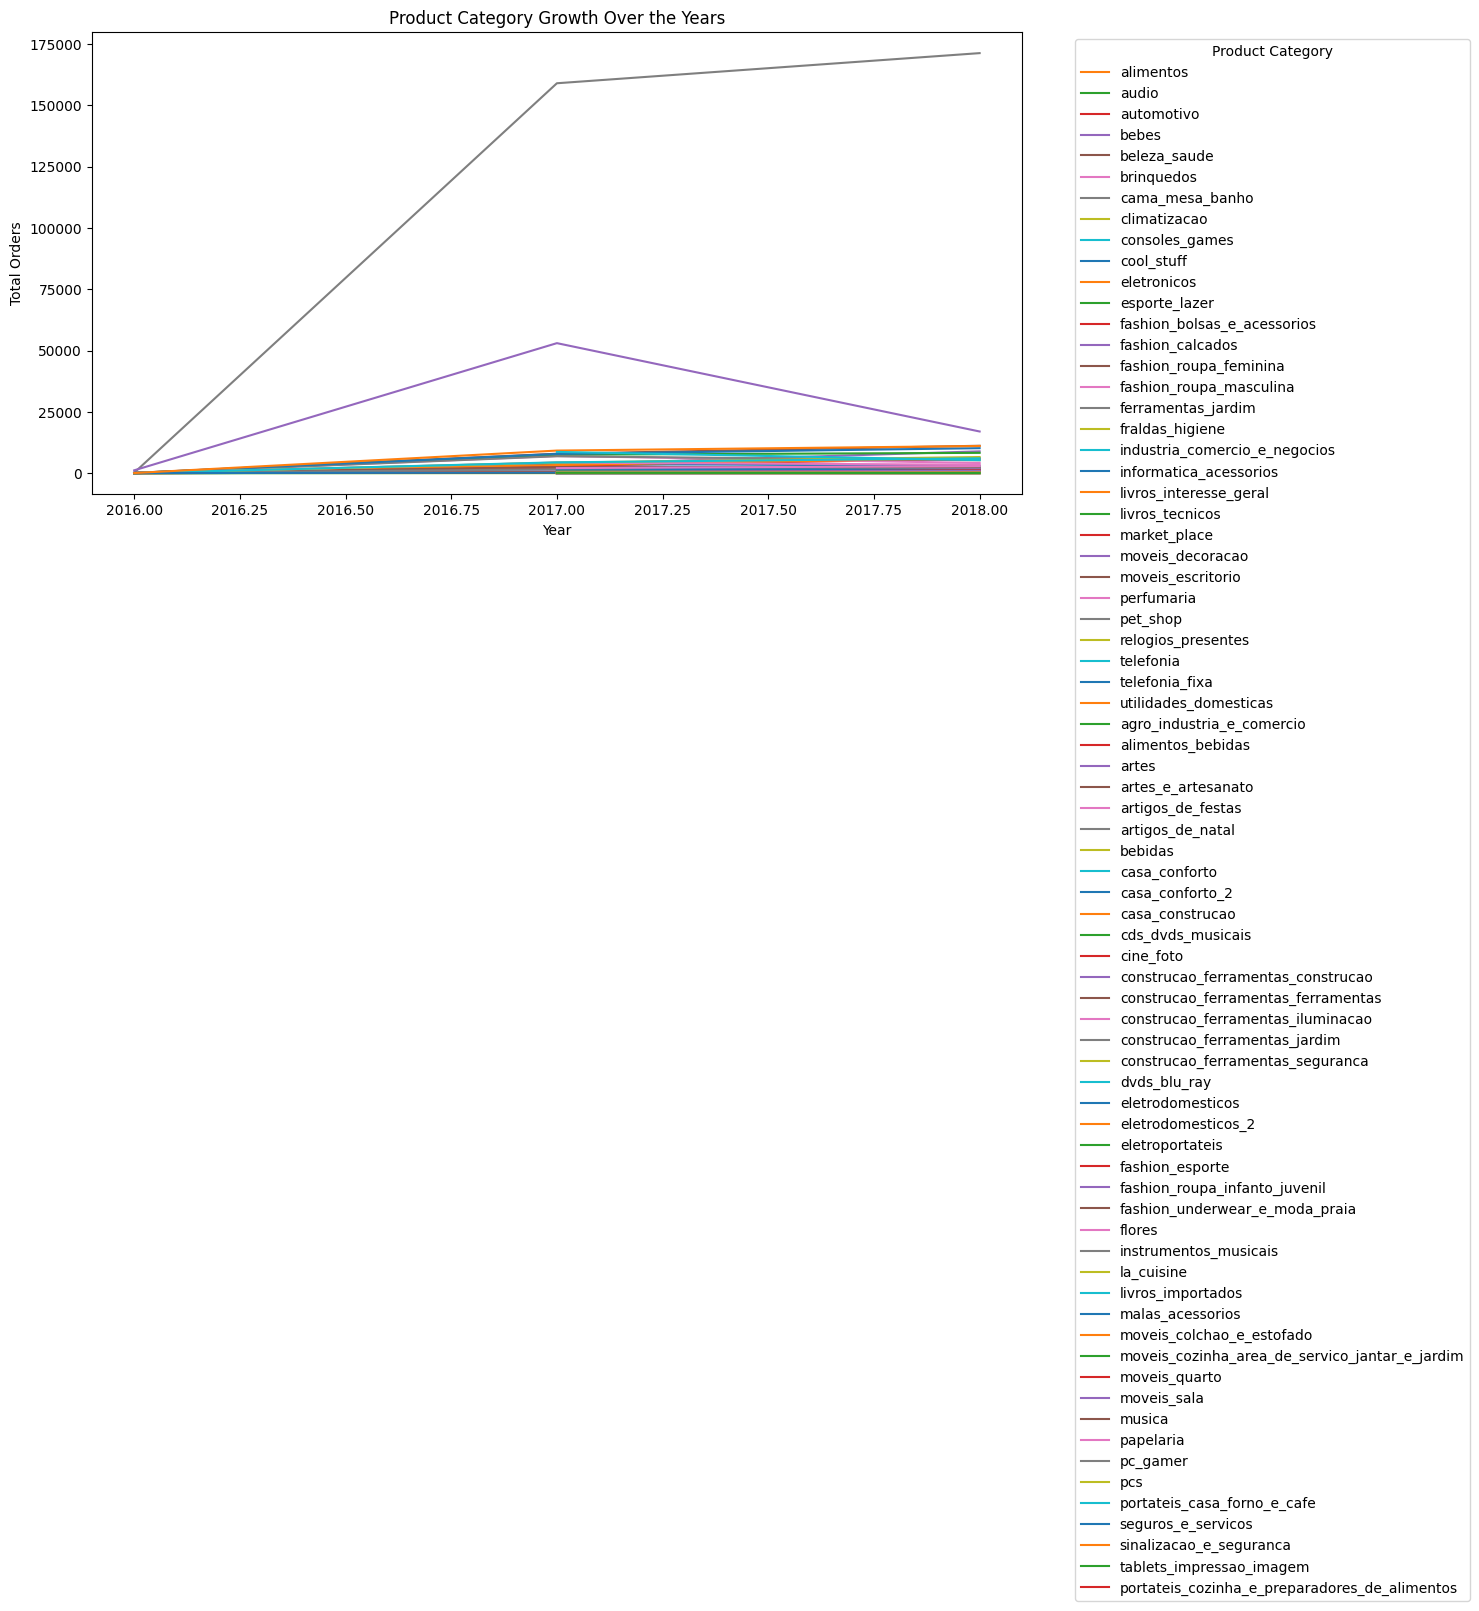

In [101]:
# 7.6
# Filter hanya pesanan valid (tidak cancelled atau unavailable)
valid_orders = df[~df["order_status"].isin(["cancelled", "unavailable"])].copy()

# Pastikan order_purchase_timestamp dalam format datetime
valid_orders["order_purchase_timestamp"] = pd.to_datetime(valid_orders["order_purchase_timestamp"])

# Tambahkan kolom tahun
valid_orders["order_year"] = valid_orders["order_purchase_timestamp"].dt.year

# Hitung total pesanan per kategori produk tiap tahun
category_by_year = valid_orders.groupby(["order_year", "product_category_name"])["order_id"].count().reset_index()
category_by_year.rename(columns={"order_id": "total_orders"}, inplace=True)

# Ambil 5 kategori produk paling populer setiap tahun
top_categories_per_year = category_by_year.loc[category_by_year.groupby("order_year")["total_orders"].idxmax()]

# Cek hasil
print(top_categories_per_year)

# Visualisasi perkembangan kategori produk setiap tahun
plt.figure(figsize=(12,6))
sns.lineplot(data=category_by_year, x="order_year", y="total_orders", hue="product_category_name", palette="tab10")
plt.title("Product Category Growth Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Orders")
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [ ]:
# Kesimpulan

                 customer_unique_id  avg_review_score satisfaction_level
0  0000366f3b9a7992bf8c76cfdf3221e2               5.0          Satisfied
1  0000b849f77a49e4a4ce2b2a4ca5be3f               4.0          Satisfied
2  0000f46a3911fa3c0805444483337064               3.0      Not Satisfied
3  0000f6ccb0745a6a4b88665a16c9f078               4.0          Satisfied
4  0004aac84e0df4da2b147fca70cf8255               5.0          Satisfied


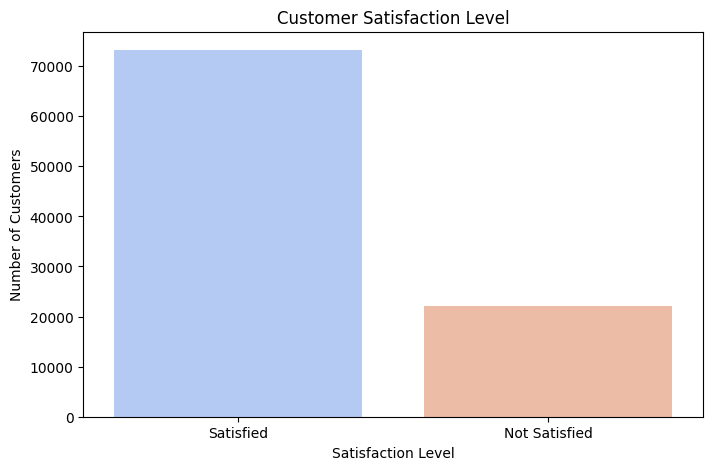

In [103]:
# 8.1
# Filter hanya pesanan valid (tidak cancelled atau unavailable)
valid_orders = df[~df["order_status"].isin(["cancelled", "unavailable"])].copy()

# Pastikan review_score bertipe numerik
valid_orders["review_score"] = pd.to_numeric(valid_orders["review_score"], errors="coerce")

# Hitung rata-rata review score per customer
customer_reviews = valid_orders.groupby("customer_unique_id")["review_score"].mean().reset_index()
customer_reviews.rename(columns={"review_score": "avg_review_score"}, inplace=True)

# Kategorikan tingkat kepuasan pelanggan
customer_reviews["satisfaction_level"] = customer_reviews["avg_review_score"].apply(lambda x: "Satisfied" if x >= 4 else "Not Satisfied")

# Cek hasil
print(customer_reviews.head())

# Visualisasi distribusi kepuasan pelanggan
plt.figure(figsize=(8,5))
sns.countplot(data=customer_reviews, x="satisfaction_level", hue="satisfaction_level", legend=False, palette="coolwarm")
plt.title("Customer Satisfaction Level")
plt.xlabel("Satisfaction Level")
plt.ylabel("Number of Customers")
plt.show()

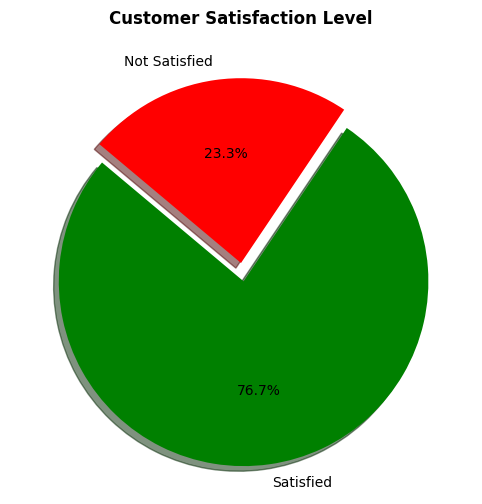

In [103]:
# Filter hanya pesanan valid (tidak cancelled atau unavailable)
valid_orders = df[~df["order_status"].isin(["cancelled", "unavailable"])].copy()

# Pastikan review_score bertipe numerik
valid_orders["review_score"] = pd.to_numeric(valid_orders["review_score"], errors="coerce")

# Hitung rata-rata review score per customer
customer_reviews = valid_orders.groupby("customer_unique_id")["review_score"].mean().reset_index()
customer_reviews.rename(columns={"review_score": "avg_review_score"}, inplace=True)

# Kategorikan tingkat kepuasan pelanggan
customer_reviews["satisfaction_level"] = customer_reviews["avg_review_score"].apply(lambda x: "Satisfied" if x >= 4 else "Not Satisfied")

# Hitung jumlah pelanggan dalam setiap kategori kepuasan
satisfaction_counts = customer_reviews["satisfaction_level"].value_counts()

# Visualisasi dengan Pie Chart
plt.figure(figsize=(8, 6))
colors = ["green", "red"]  # Warna untuk kategori
explode = [0.1, 0]  # Sorot kategori "Satisfied"

plt.pie(
    satisfaction_counts,
    labels=satisfaction_counts.index,
    autopct="%1.1f%%",
    colors=colors,
    startangle=140,
    explode=explode,
    shadow=True
)

plt.title("Customer Satisfaction Level", fontweight="bold")
plt.show()

In [131]:
# 8.2
# Filter hanya pesanan valid (tidak cancelled atau unavailable)
valid_orders = df[~df["order_status"].isin(["cancelled", "unavailable"])].copy()

# Pilih pelanggan yang mengisi review_comment_title dan review_comment_message
reviewed_customers = valid_orders.dropna(subset=["review_comment_title", "review_comment_message"])

# Hitung total review per customer
customer_review_counts = reviewed_customers.groupby("customer_unique_id")["review_id"].count().reset_index()
customer_review_counts.rename(columns={"review_id": "total_reviews"}, inplace=True)

# Ambil total order per customer dari langkah sebelumnya
total_orders_per_customer = valid_orders.groupby("customer_unique_id")["order_id"].nunique().reset_index()
total_orders_per_customer.rename(columns={"order_id": "total_orders"}, inplace=True)

# Gabungkan total reviews dengan total orders
customer_review_ratio = customer_review_counts.merge(total_orders_per_customer, on="customer_unique_id", how="left")

# Hitung rasio review per transaksi
customer_review_ratio["review_ratio_per_transaction"] = customer_review_ratio["total_reviews"] / customer_review_ratio["total_orders"]

# Cek hasil
print(customer_review_ratio.head())

                 customer_unique_id  total_reviews  total_orders  \
0  0000366f3b9a7992bf8c76cfdf3221e2              3             1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f              2             1   
2  0000f46a3911fa3c0805444483337064              2             1   
3  0000f6ccb0745a6a4b88665a16c9f078              2             1   
4  0004aac84e0df4da2b147fca70cf8255              3             1   

   review_ratio_per_transaction  
0                           3.0  
1                           2.0  
2                           2.0  
3                           2.0  
4                           3.0  


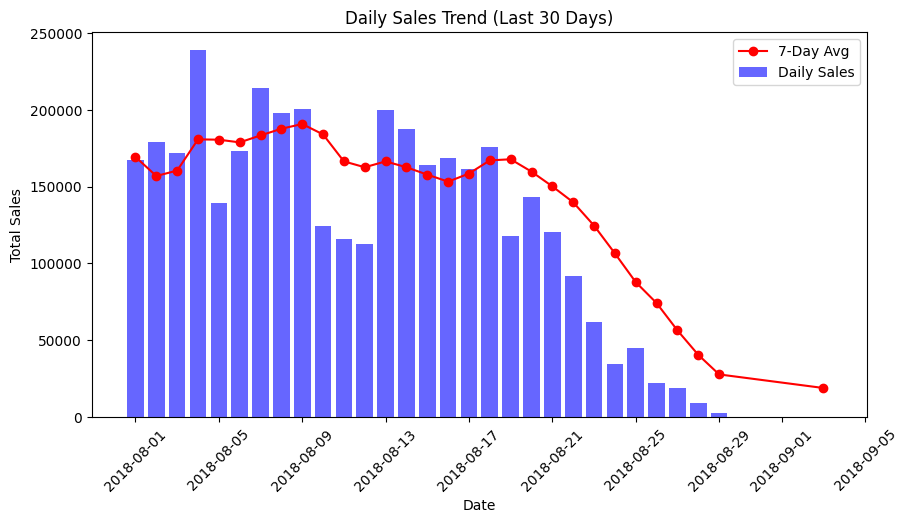

In [149]:
# 9.1
# Filter hanya pesanan valid (tidak cancelled atau unavailable)
valid_orders = df[~df["order_status"].isin(["cancelled", "unavailable"])].copy()

# Konversi order_purchase_timestamp ke format datetime jika belum
valid_orders["order_purchase_timestamp"] = pd.to_datetime(valid_orders["order_purchase_timestamp"])

# Filter hanya 6 bulan terakhir untuk mengurangi jumlah data
six_months_ago = valid_orders["order_purchase_timestamp"].max() - pd.DateOffset(months=6)
valid_orders = valid_orders[valid_orders["order_purchase_timestamp"] >= six_months_ago]

# Hitung total order value per hari (pastikan angka dikonversi ke float)
valid_orders["price"] = pd.to_numeric(valid_orders["price"], errors="coerce")
valid_orders["freight_value"] = pd.to_numeric(valid_orders["freight_value"], errors="coerce")
valid_orders["total_order_value"] = valid_orders["price"] + valid_orders["freight_value"]

# Grouping total sales per day
daily_sales = valid_orders.groupby(valid_orders["order_purchase_timestamp"].dt.date)["total_order_value"].sum().reset_index()
daily_sales.rename(columns={"order_purchase_timestamp": "order_date"}, inplace=True)

# **Solusi Utama**: Konversi total_order_value ke float untuk rolling average
daily_sales["total_order_value"] = pd.to_numeric(daily_sales["total_order_value"], errors="coerce")

# Hitung rata-rata bergerak 7 hari untuk mengurangi noise
daily_sales["rolling_avg"] = daily_sales["total_order_value"].rolling(window=7).mean()

# Gunakan hanya 30 hari terakhir untuk visualisasi yang lebih ringan
last_30_days = daily_sales.tail(30)

# Visualisasi dengan bar chart
plt.figure(figsize=(10,5))
plt.bar(last_30_days["order_date"], last_30_days["total_order_value"], color="blue", alpha=0.6, label="Daily Sales")
plt.plot(last_30_days["order_date"], last_30_days["rolling_avg"], color="red", marker="o", linestyle="-", label="7-Day Avg")
plt.title("Daily Sales Trend (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.legend()
plt.show()

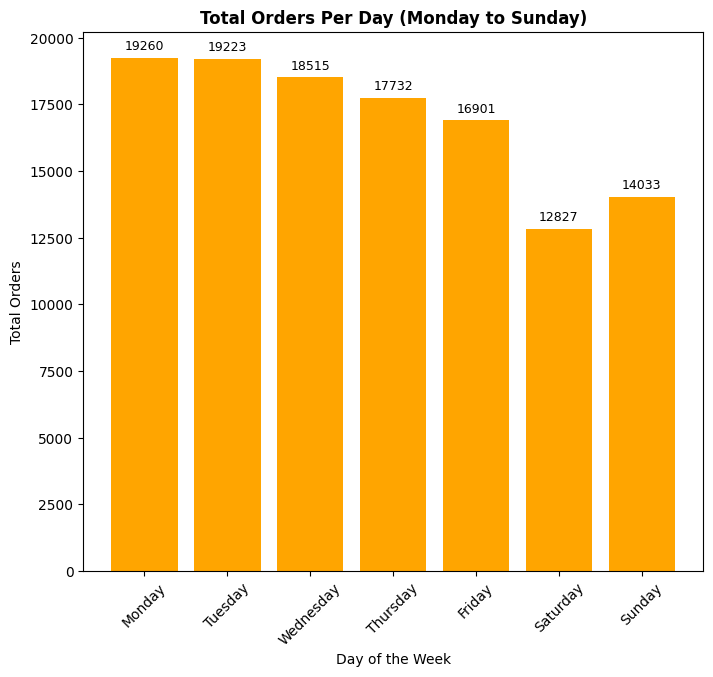

In [99]:
# 9.2
# Filter hanya pesanan valid (tidak cancelled atau unavailable)
valid_orders = df[~df["order_status"].isin(["cancelled", "unavailable"])].copy()

# Konversi order_purchase_timestamp ke format datetime jika belum
valid_orders["order_purchase_timestamp"] = pd.to_datetime(valid_orders["order_purchase_timestamp"])

# Tambahkan kolom nama hari (Monday - Sunday)
valid_orders["order_day"] = valid_orders["order_purchase_timestamp"].dt.day_name()

# Hitung total order per hari dalam seminggu
orders_by_day = valid_orders["order_day"].value_counts().reindex(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
).reset_index()

# Ubah nama kolom
orders_by_day.columns = ["day_of_week", "total_orders"]

# Visualisasi dengan bar chart
plt.figure(figsize=(8,7))
bars = plt.bar(orders_by_day["day_of_week"], orders_by_day["total_orders"], color="orange")

# Tambahkan label total order di atas setiap bar dengan margin agar terlihat
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,  # Posisi X (tengah batang)
             bar.get_height() + 200,          # Posisi Y (sedikit di atas batang)
             str(int(bar.get_height())),      # Teks label jumlah order
             ha="center", va="bottom",        # Posisi teks (center horizontal, bottom vertical)
             fontsize=9, color="black")  # Warna dan gaya teks

# Menambahkan judul dan label
plt.title("Total Orders Per Day (Monday to Sunday)", fontweight="bold")
plt.xlabel("Day of the Week")
plt.ylabel("Total Orders")
plt.xticks(rotation=45)

# Tampilkan plot
plt.show()

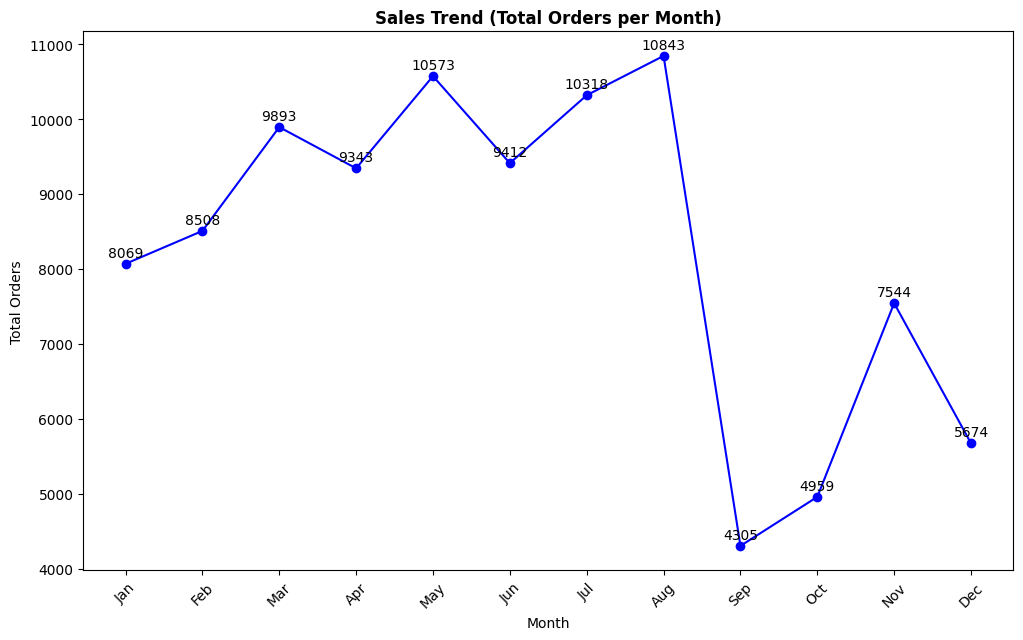

In [41]:
# 1. Sales Trend (Total Orders per Month)
# Connect to SQLite database
conn = sqlite3.connect("foo.db")

# Query untuk mendapatkan total orders per bulan
query_sales = """
SELECT strftime('%m', order_purchase_timestamp) AS month, COUNT(order_id) AS total_orders
FROM olist_orders_dataset
GROUP BY month
ORDER BY month
"""

# Eksekusi query
df_sales = pd.read_sql(query_sales, conn)

# Tutup koneksi setelah query berhasil dieksekusi
conn.close()

# Format bulan ke dalam bentuk singkatan (Jan, Feb, dst.)
df_sales["month"] = pd.to_datetime(df_sales["month"], format="%m").dt.strftime("%b")

# Visualisasi
plt.figure(figsize=(12, 7))
plt.plot(df_sales["month"], df_sales["total_orders"], marker="o", linestyle="-", color="b")

# Tambahkan label jumlah order di setiap titik
for i, txt in enumerate(df_sales["total_orders"]):
    plt.annotate(txt, (df_sales["month"][i], df_sales["total_orders"][i]), 
                 textcoords="offset points", xytext=(0,5), ha='center', fontsize=10, color="black")

# Konfigurasi plot
plt.title("Sales Trend (Total Orders per Month)", fontweight="bold")
plt.xlabel("Month")
plt.ylabel("Total Orders")
#plt.grid(True)
plt.xticks(rotation=45)
plt.show()

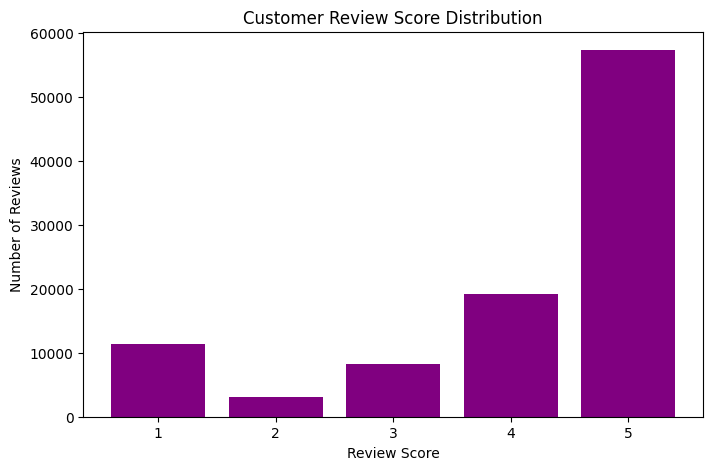

In [179]:
# 4. Review Score Distribution
# Connect to SQLite database
conn = sqlite3.connect("foo.db")
query_reviews = """
SELECT review_score, COUNT(review_id) AS total_reviews
FROM olist_order_reviews_dataset
GROUP BY review_score
ORDER BY review_score
"""
df_reviews = pd.read_sql(query_reviews, conn)

# Tutup koneksi setelah query berhasil dieksekusi
conn.close()

plt.figure(figsize=(8, 5))
plt.bar(df_reviews["review_score"].astype(str), df_reviews["total_reviews"], color="purple")
plt.xlabel("Review Score")
plt.ylabel("Number of Reviews")
plt.title("Customer Review Score Distribution")
plt.show()

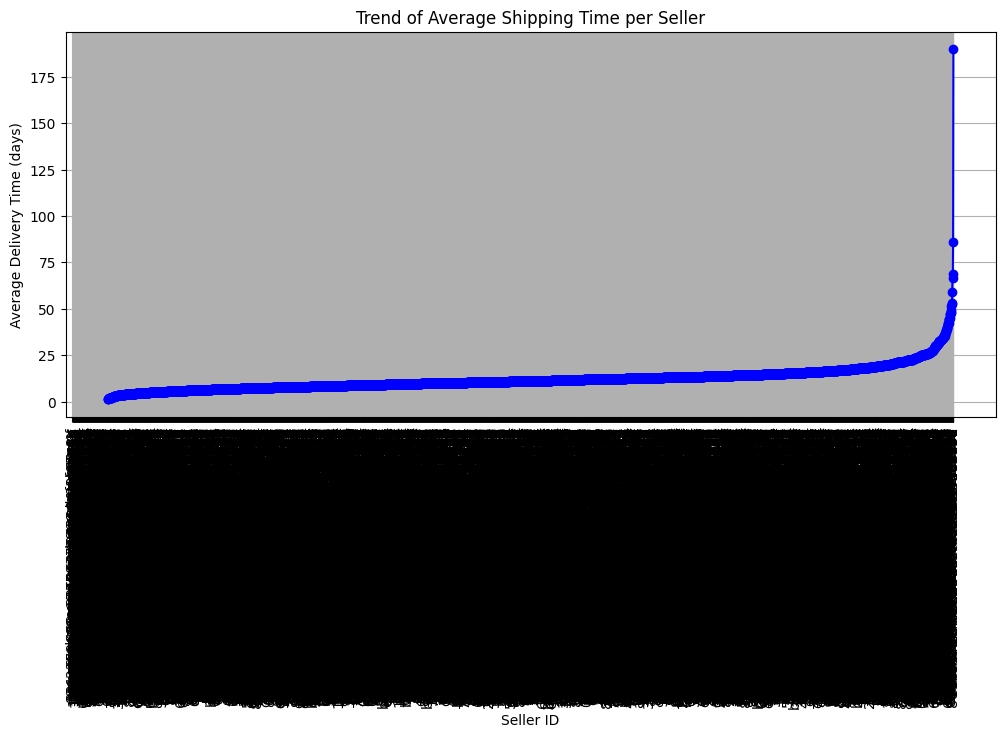

In [185]:
# Koneksi ke database
conn = sqlite3.connect("foo.db")

# Query untuk menghitung rata-rata waktu pengiriman per seller
query_shipping_time = """
SELECT seller_id, 
       AVG(julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp)) AS avg_shipping_time
FROM olist_orders_dataset o
JOIN olist_order_items_dataset oi ON o.order_id = oi.order_id
WHERE order_delivered_customer_date IS NOT NULL
GROUP BY seller_id
ORDER BY avg_shipping_time
"""

df_shipping = pd.read_sql(query_shipping_time, conn)

# Tutup koneksi database
conn.close()

# Line Chart untuk tren rata-rata waktu pengiriman
plt.figure(figsize=(12, 5))
plt.plot(df_shipping["seller_id"], df_shipping["avg_shipping_time"], marker="o", linestyle="-", color="blue")
plt.xlabel("Seller ID")
plt.ylabel("Average Delivery Time (days)")
plt.title("Trend of Average Shipping Time per Seller")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

<Figure size 800x500 with 0 Axes>

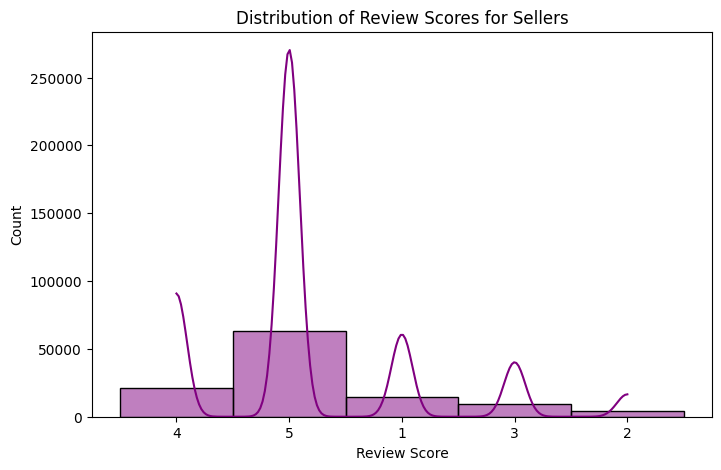

In [189]:
# Koneksi ke database
conn = sqlite3.connect("foo.db")

# Query untuk mendapatkan review score per seller
query_review_score = """
SELECT oi.seller_id, orv.review_score
FROM olist_order_reviews_dataset orv
JOIN olist_orders_dataset o ON orv.order_id = o.order_id
JOIN olist_order_items_dataset oi ON o.order_id = oi.order_id
"""

df_reviews = pd.read_sql(query_review_score, conn)

# Tutup koneksi database
conn.close()

# Histogram distribusi review score
plt.figure(figsize=(8, 5))
sns.histplot(df_reviews["review_score"], bins=5, kde=True, color="purple")
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.title("Distribution of Review Scores for Sellers")
plt.show()

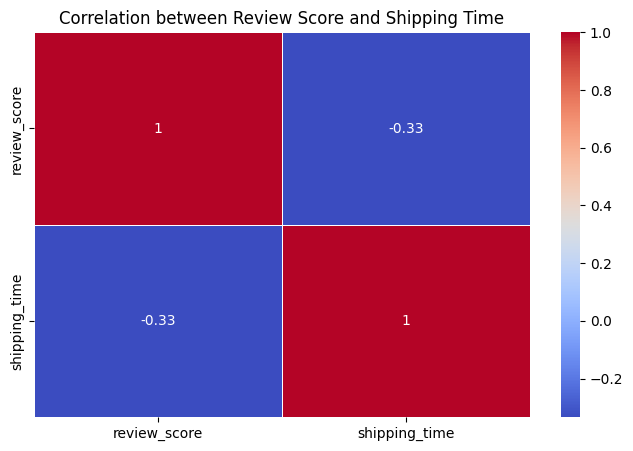

In [191]:
# Connect to SQLite database
conn = sqlite3.connect("foo.db")

# Query untuk mengambil review score dan waktu pengiriman per order
query_review_shipping = """
SELECT 
    review_score, 
    julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp) AS shipping_time
FROM olist_orders_dataset o
JOIN olist_order_reviews_dataset r ON o.order_id = r.order_id
WHERE review_score IS NOT NULL 
AND order_delivered_customer_date IS NOT NULL
AND order_purchase_timestamp IS NOT NULL
"""
df_review_shipping = pd.read_sql(query_review_shipping, conn)

# Tutup koneksi database setelah query selesai
conn.close()

# Konversi kolom menjadi tipe numerik jika belum
df_review_shipping["review_score"] = pd.to_numeric(df_review_shipping["review_score"], errors="coerce")
df_review_shipping["shipping_time"] = pd.to_numeric(df_review_shipping["shipping_time"], errors="coerce")

# Pastikan hanya kolom numerik yang digunakan untuk korelasi
correlation_matrix = df_review_shipping.corr()

# Visualisasi Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation between Review Score and Shipping Time")
plt.show()

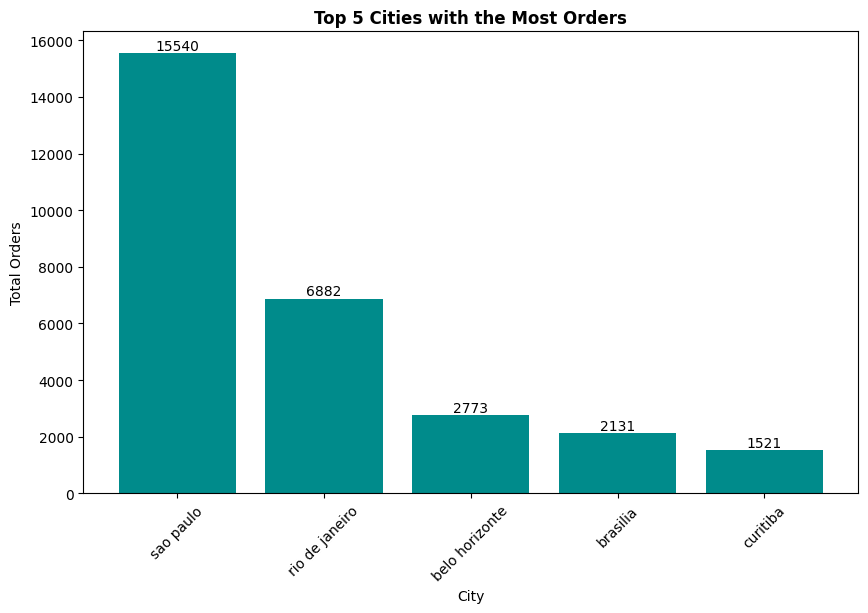

In [37]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect("foo.db")

# Query untuk mendapatkan jumlah orders per kota
query_city_orders = """
SELECT c.customer_city, COUNT(o.order_id) AS total_orders
FROM olist_orders_dataset o
JOIN olist_customers_dataset c ON o.customer_id = c.customer_id
GROUP BY c.customer_city
ORDER BY total_orders DESC
LIMIT 5
"""

# Eksekusi query
df_city_orders = pd.read_sql(query_city_orders, conn)

# Tutup koneksi setelah query berhasil dieksekusi
conn.close()

# Visualisasi Bar Chart
plt.figure(figsize=(10, 6))
bars = plt.bar(df_city_orders["customer_city"], df_city_orders["total_orders"], color="darkcyan")

# Tambahkan label jumlah total order di atas setiap batang
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2,  # Posisi X (tengah batang)
             bar.get_height(),                 # Posisi Y (di atas batang)
             str(int(bar.get_height())),       # Teks label
             ha="center", va="bottom", fontsize=10)

# Menambahkan label dan judul
plt.xlabel("City")
plt.ylabel("Total Orders")
plt.title("Top 5 Cities with the Most Orders", fontweight="bold")
plt.xticks(rotation=45)

# Menampilkan plot
plt.show()

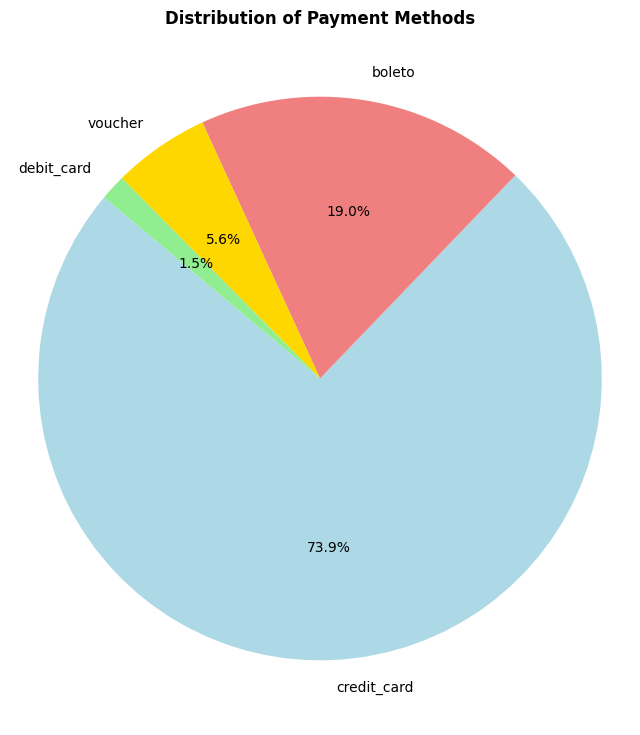

In [45]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect("foo.db")

# Query untuk mendapatkan jumlah transaksi berdasarkan metode pembayaran
query_payment_methods = """
SELECT payment_type, COUNT(order_id) AS total_orders
FROM olist_order_payments_dataset
WHERE payment_type not in ('not_defined')
GROUP BY payment_type
ORDER BY total_orders DESC
"""

# Eksekusi query
df_payment = pd.read_sql(query_payment_methods, conn)

# Tutup koneksi database setelah query berhasil dieksekusi
conn.close()

# Visualisasi Pie Chart
plt.figure(figsize=(8, 9))
plt.pie(df_payment["total_orders"], labels=df_payment["payment_type"], autopct="%1.1f%%", colors=["lightblue", "lightcoral", "gold", "lightgreen"], startangle=140)
plt.title("Distribution of Payment Methods", fontweight="bold")
plt.axis("equal")  # Membuat pie chart berbentuk lingkaran sempurna
plt.show()

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64


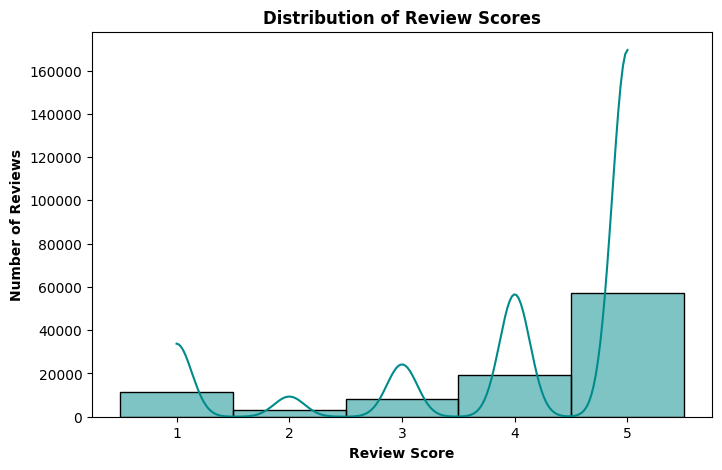

In [107]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Connect to SQLite database
conn = sqlite3.connect("foo.db")

# Query to fetch review scores
query_review_scores = """
SELECT review_score FROM olist_order_reviews_dataset
"""

# Execute query and load data into DataFrame
df_reviews = pd.read_sql(query_review_scores, conn)

# Close database connection
conn.close()

# Ensure review_score is numeric
df_reviews["review_score"] = pd.to_numeric(df_reviews["review_score"], errors="coerce")

# Display counts of each review score to verify all values exist
print(df_reviews["review_score"].value_counts().sort_index())

# Plot Histogram with correct binning
plt.figure(figsize=(8, 5))
sns.histplot(df_reviews["review_score"], bins=np.arange(0.5, 5.5, 1), kde=True, color="darkcyan", discrete=True)

# Formatting
plt.xlabel("Review Score", fontweight="bold")
plt.ylabel("Number of Reviews", fontweight="bold")
plt.title("Distribution of Review Scores", fontweight="bold")
plt.xticks([1, 2, 3, 4, 5])  # Ensure all review scores are shown properly
#plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

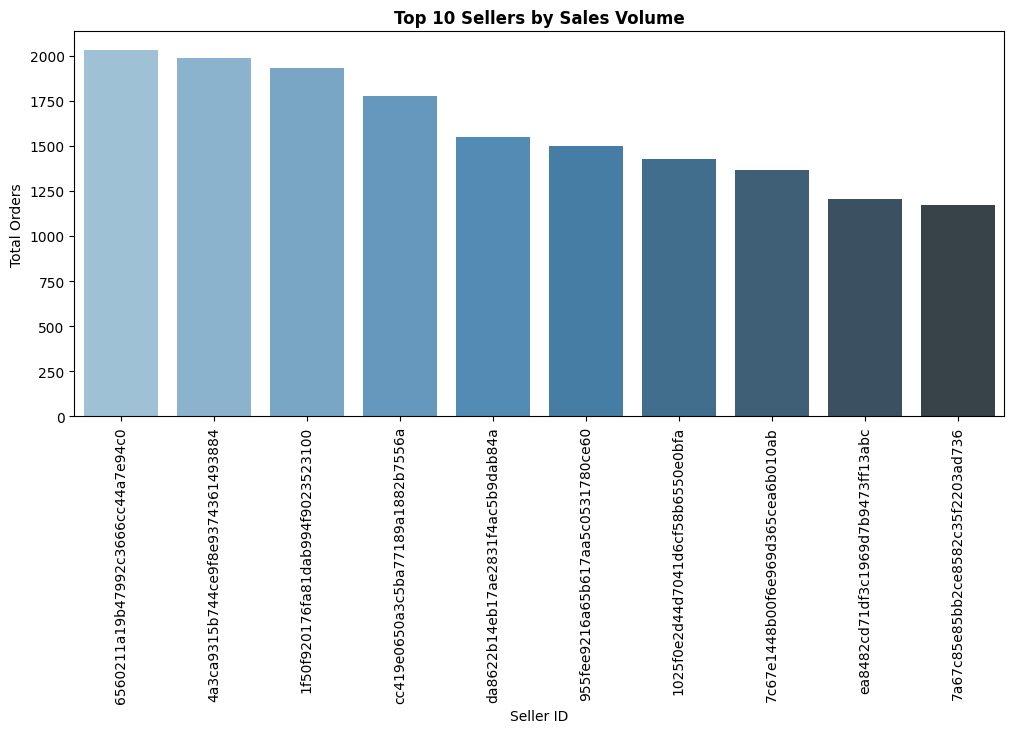

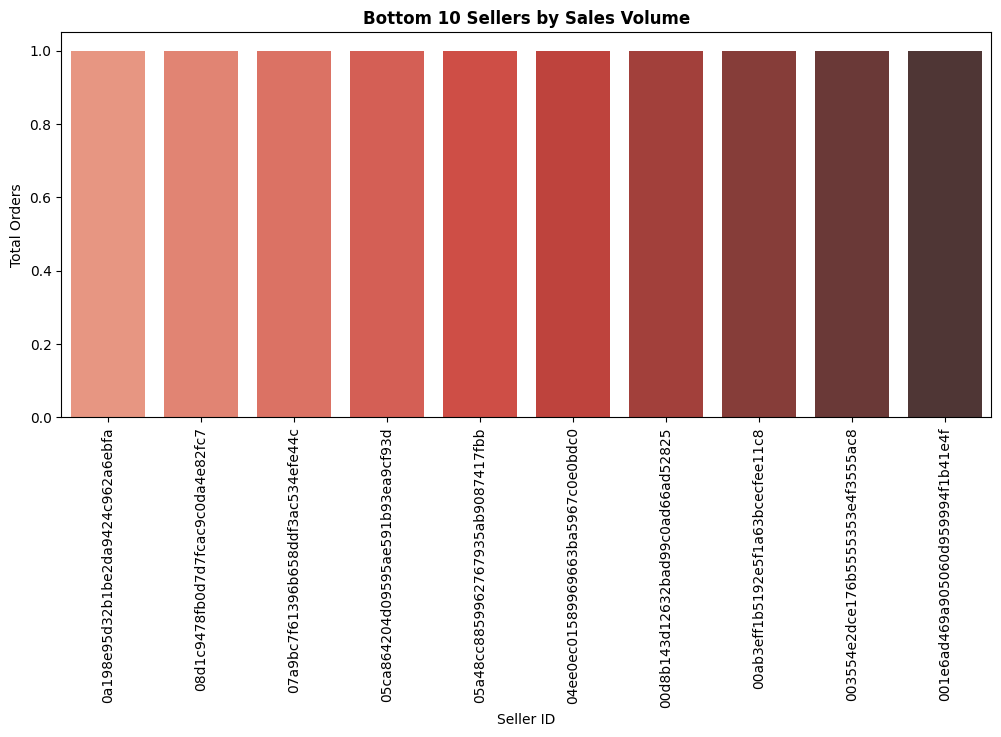

In [67]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to SQLite database
conn = sqlite3.connect("foo.db")

# Query untuk mengambil data jumlah order per seller
query_seller_sales = """
SELECT seller_id, COUNT(order_id) AS total_orders
FROM olist_order_items_dataset
GROUP BY seller_id
ORDER BY total_orders DESC
"""

# Eksekusi query
df_sellers = pd.read_sql(query_seller_sales, conn)

# Tutup koneksi database
conn.close()

# Ambil 10 seller dengan penjualan tertinggi dan terendah
top_sellers = df_sellers.head(10)
bottom_sellers = df_sellers.tail(10)

# Visualisasi Bar Chart - Top Sellers
plt.figure(figsize=(12, 5))
sns.barplot(data=top_sellers, x="seller_id", y="total_orders", hue="seller_id", palette="Blues_d", legend=False)
plt.xticks(rotation=90)
plt.title("Top 10 Sellers by Sales Volume", fontweight="bold")
plt.xlabel("Seller ID")
plt.ylabel("Total Orders")
plt.show()

# Visualisasi Bar Chart - Bottom Sellers
plt.figure(figsize=(12, 5))
sns.barplot(data=bottom_sellers, x="seller_id", y="total_orders", hue="seller_id", palette="Reds_d", legend=False)
plt.xticks(rotation=90)
plt.title("Bottom 10 Sellers by Sales Volume", fontweight="bold")
plt.xlabel("Seller ID")
plt.ylabel("Total Orders")
plt.show()

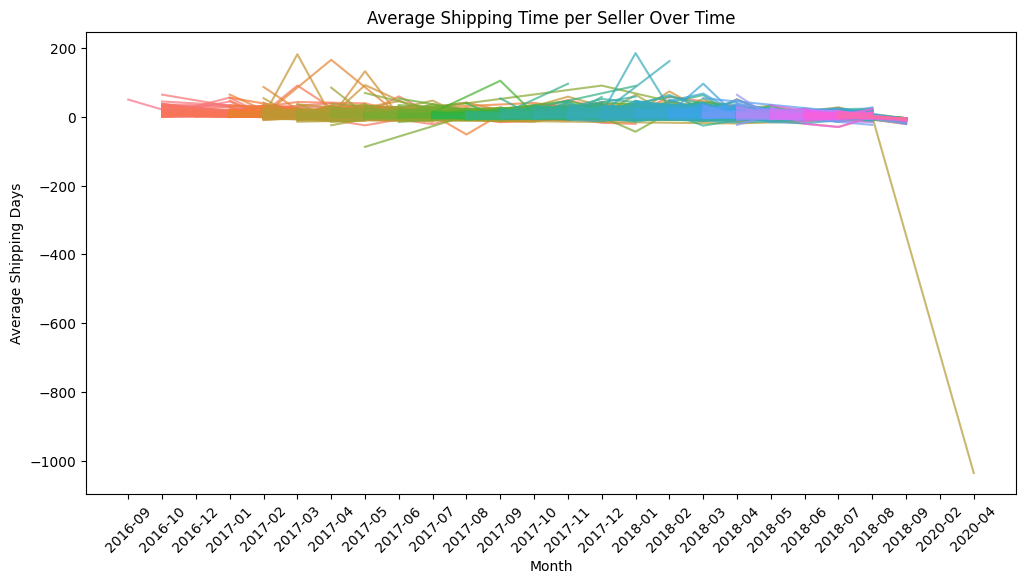

In [35]:
# Connect to SQLite database
conn = sqlite3.connect("foo.db")

# Query untuk mengambil data waktu pengiriman per seller
query_shipping_trend = """
SELECT seller_id, 
       strftime('%Y-%m', shipping_limit_date) AS month, 
       AVG(julianday(order_delivered_customer_date) - julianday(shipping_limit_date)) AS avg_shipping_days
FROM olist_order_items_dataset
JOIN olist_orders_dataset USING(order_id)
WHERE order_delivered_customer_date IS NOT NULL
GROUP BY seller_id, month
ORDER BY month
"""

# Eksekusi query
df_shipping = pd.read_sql(query_shipping_trend, conn)

# Tutup koneksi database
conn.close()

# Visualisasi Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_shipping, x="month", y="avg_shipping_days", hue="seller_id", alpha=0.7)
plt.xticks(rotation=45)
plt.title("Average Shipping Time per Seller Over Time")
plt.xlabel("Month")
plt.ylabel("Average Shipping Days")
plt.legend([],[], frameon=False)  # Hide legend to prevent too many labels
plt.show()

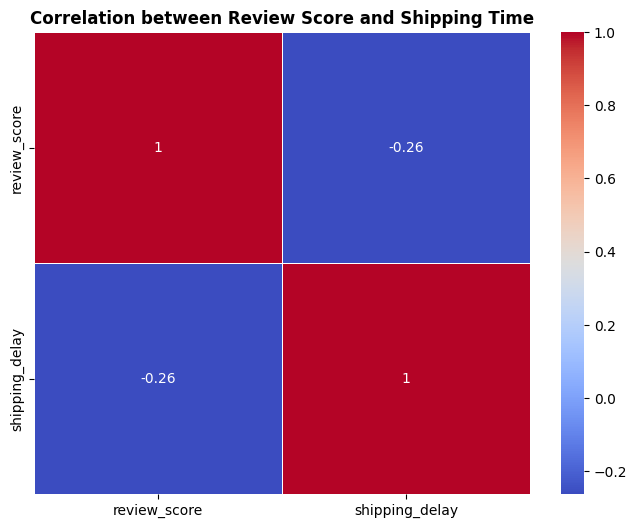

In [69]:
# Connect to SQLite database
conn = sqlite3.connect("foo.db")

# Query untuk mengambil data review score dan shipping time
query_review_shipping = """
SELECT review_score, 
       (julianday(order_delivered_customer_date) - julianday(shipping_limit_date)) AS shipping_delay
FROM olist_order_reviews_dataset
JOIN olist_orders_dataset USING(order_id)
JOIN olist_order_items_dataset USING(order_id)
WHERE order_delivered_customer_date IS NOT NULL;
"""

# Eksekusi query
df_review_shipping = pd.read_sql(query_review_shipping, conn)

# Tutup koneksi database
conn.close()

# Drop missing values
df_review_shipping.dropna(inplace=True)

# Visualisasi Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_review_shipping.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation between Review Score and Shipping Time", fontweight="bold")
plt.show()

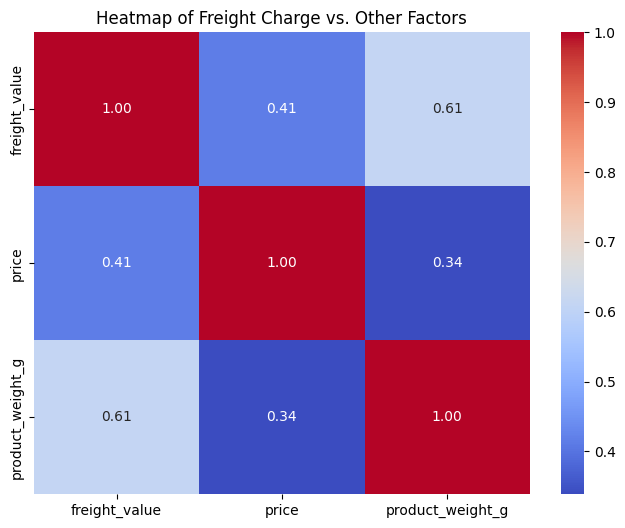

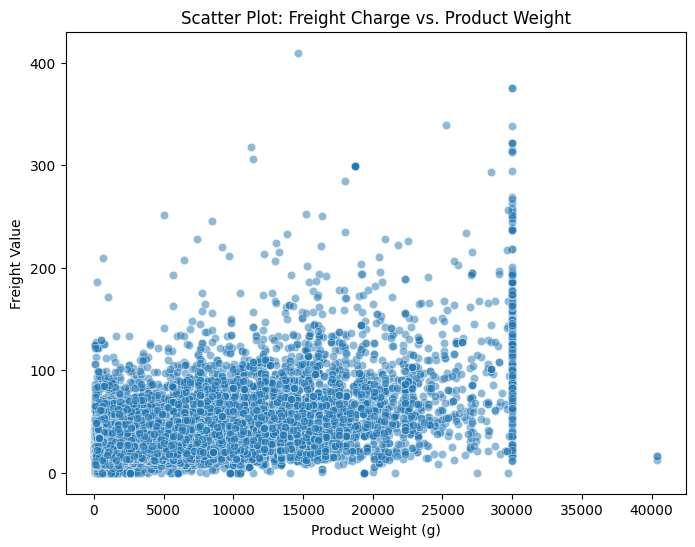

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

# Koneksi ke database foo.db
conn = sqlite3.connect("foo.db")

# Query untuk mengambil data yang diperlukan
query = """
SELECT oi.freight_value, oi.price, op.product_weight_g
FROM olist_order_items_dataset oi
JOIN olist_products_dataset op USING(product_id)
"""

# Membaca data ke dalam DataFrame
df_freight = pd.read_sql(query, conn)

# Tutup koneksi database
conn.close()

# ---- Membersihkan Data ----
# Konversi ke numerik, jika ada string kosong atau tidak valid maka jadi NaN
df_freight["freight_value"] = pd.to_numeric(df_freight["freight_value"], errors='coerce')
df_freight["price"] = pd.to_numeric(df_freight["price"], errors='coerce')
df_freight["product_weight_g"] = pd.to_numeric(df_freight["product_weight_g"], errors='coerce')

# Hapus baris yang memiliki nilai NaN
df_freight = df_freight.dropna()

# ---- HEATMAP: Korelasi antara Freight, Price, dan Weight ----
plt.figure(figsize=(8, 6))
sns.heatmap(df_freight.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap of Freight Charge vs. Other Factors")
plt.show()

# ---- SCATTER PLOT: Freight Charge vs. Product Weight ----
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_freight, x="product_weight_g", y="freight_value", alpha=0.5)
plt.title("Scatter Plot: Freight Charge vs. Product Weight")
plt.xlabel("Product Weight (g)")
plt.ylabel("Freight Value")
plt.show()


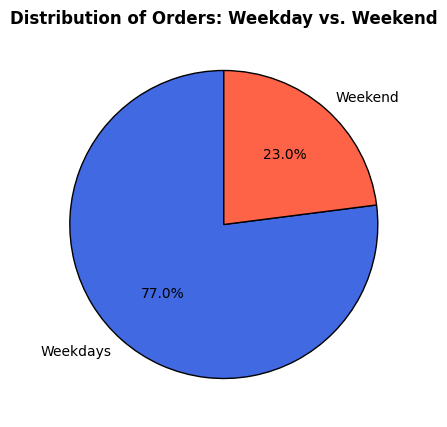

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# Koneksi ke database foo.db
conn = sqlite3.connect("foo.db")

# Query untuk mengambil data order dengan timestamp pembelian
query = """
SELECT order_id, order_purchase_timestamp
FROM olist_orders_dataset
"""

# Membaca data ke dalam DataFrame
df_orders = pd.read_sql(query, conn)

# Tutup koneksi database
conn.close()

# ---- Data Cleaning & Preprocessing ----
# Konversi kolom timestamp ke datetime
df_orders["order_purchase_timestamp"] = pd.to_datetime(df_orders["order_purchase_timestamp"])

# Ambil hari dalam seminggu (0=Senin, ..., 6=Minggu)
df_orders["day_of_week"] = df_orders["order_purchase_timestamp"].dt.dayofweek

# Kategorisasi ke dalam Weekday (0–4) dan Weekend (5–6)
df_orders["day_type"] = df_orders["day_of_week"].apply(lambda x: "Weekdays" if x < 5 else "Weekend")

# ---- Hitung jumlah pesanan per kategori ----
order_counts = df_orders["day_type"].value_counts()

# ---- Visualisasi: Pie Chart ----
plt.figure(figsize=(6, 5))
colors = ["royalblue", "tomato"]
plt.pie(order_counts, labels=order_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Distribution of Orders: Weekday vs. Weekend", fontweight="bold")
plt.show()